In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Machine learning model
from sklearn.ensemble import RandomForestClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [2]:
from google.colab import files

# Prompt user to upload the dataset file
uploaded = files.upload()



Saving tested.csv to tested.csv


In [4]:
# Load the uploaded CSV into a DataFrame
df = pd.read_csv("tested.csv")

# Display the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Step 3.1: Check shape and missing values
print("Dataset Shape:", df.shape)
print("\nMissing values per column:\n")
print(df.isnull().sum())


Dataset Shape: (418, 12)

Missing values per column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
#3.2
#  Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns not useful for prediction
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# Confirm changes
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())



Missing values after cleaning:

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


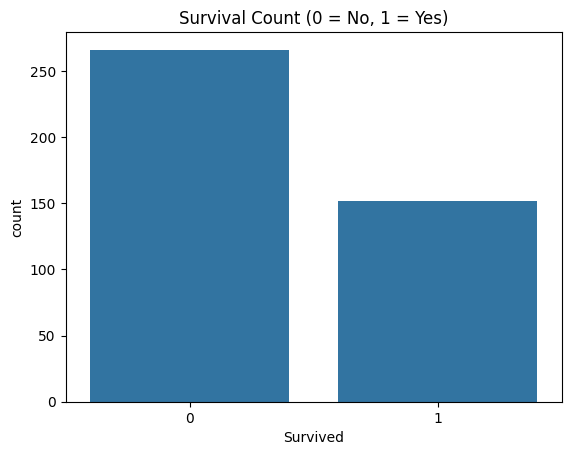

In [7]:
# Step 3.3: Simple plot to visualize survival distribution
sns.countplot(data=df, x='Survived')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()


In [8]:
# Encode 'Sex' and 'Embarked' using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2 (order might vary)


In [9]:
# Define input features and target variable
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [10]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Convert to DataFrame for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.497811,-0.470915
1,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.512660,0.700767
2,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.464532,-0.470915
3,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.482888,0.700767
4,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.417971,0.700767


In [11]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Train samples: 334
Test samples: 84


In [12]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [13]:
# Predict on test data
y_pred = model.predict(X_test)


In [14]:
# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [15]:
import joblib

# Save the model
joblib.dump(model, 'titanic_rf_model.pkl')
print("✅ Model saved as titanic_rf_model.pkl")


✅ Model saved as titanic_rf_model.pkl
